## 1. Introduction
This notebook demonstrates comprehensive EDA techiniques using a dataset that contains anonymized information from loan applications.

## 2. Data Description
### 2.1 About the dataset
The training dataset containing 44,000 loan applications, is designed for building predictive models to detect fraudulent activity. It includes a mix of applicant demographic data, financial history, loan specifics, and a binary target variables indicating whether an application was flagged as fraudulent.
### 2.2 Description of the variables

The dataset is comprised of the following columns:

#### Identifiers and Metadata

| Variable | Description |
| :--- | :--- |
| **application_id** | A unique identifier for each individual loan application. |
| **customer_id** | A unique identifier for each customer. A single customer may have multiple applications. |
| **application_date** | The date on which the loan application was submitted. |
| **data_batch_id** | An identifier for the data processing batch this record belongs to. |

#### Loan Characteristics

| Variable | Description |
| :--- | :--- |
| **loan_amount_requested** | The principal amount of the loan requested by the applicant. |
| **loan_amount_usd** | The requested loan amount converted to US Dollars for standardization. |
| **loan_tenure_months** | The duration of the loan repayment period in months. |
| **interest_rate_offered** | The annual interest rate offered for the loan. |
| **purpose_of_loan** | The stated reason for seeking the loan. |
| **loan_type_\*** | A set of binary columns indicating the specific type of loan product. |

#### Applicant Financial Profile

| Variable | Description |
| :--- | :--- |
| **employment_status** | The applicant's current employment situation. |
| **monthly_income** | The applicant's stated gross monthly income. |
| **yearly_income** | The applicant's stated gross annual income. |
| **annual_bonus** | The applicant's declared annual bonus amount. |
| **cibil_score** | A credit score (e.g., from CIBIL) representing the applicant's creditworthiness and history. **Higher scores indicate better credit health.** |
| **existing_emis_monthly** | The total amount of Equated Monthly Installments (EMIs) the applicant is currently paying for other existing loans. |
| **debt_to_income_ratio** | This ratio helps assess an applicant's ability to manage monthly payments. |
| **credit_utilization_ratio** | The ratio of the applicant's outstanding credit card debt to their total credit card limit. |

#### Applicant Demographics and Personal Information

| Variable | Description |
| :--- | :--- |
| **applicant_age** | The age of the applicant in years at the time of application. |
| **gender_\*** | A set of one-hot encoded binary columns representing the applicant's gender. |
| **property_ownership_status** | The applicant's housing situation. |
| **residential_address** | The applicant's provided residential address (likely anonymized or generalized). |
| **number_of_dependents** | The number of people financially dependent on the applicant. |

#### Target Variable

| Variable | Description |
| :--- | :--- |
| **fraud_flag** | This is the key target variable for prediction. It's a binary indicator where **1** signifies a fraudulent application and **0** signifies a legitimate application. |

## 3. Setup
The setup involves importing all requisite libraries:

In [112]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as mtick
import seaborn as sns
import missingno as msno
from scipy import stats 
from scipy.stats import ttest_ind
from IPython.display import display
ignore_warnings = True

And establishing a consistent aesthetic for the graphical outputs:

In [113]:
plt.style.use('bmh')
sns.set_theme(style="whitegrid", palette="deep")
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (12, 6)
RANDOM_STATE = 42

## 4. Data Loading
Load the train dataset containing loan application and fraud data.

In [114]:
df = pd.read_csv('train.csv')

## 5. Dataset Overview and Quality Assessment
Showing the first rows of the dataset:

In [115]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   Unnamed: 0                        application_id customer_id application_date  loan_amount_requested  loan_tenure_months  interest_rate_offered     purpose_of_loan employment_status  monthly_income  cibil_score  existing_emis_monthly  debt_to_income_ratio property_ownership_status                                                    residential_address  applicant_age  number_of_dependents  loan_type_Car Loan  loan_type_Education Loan  loan_type_Home Loan  loan_type_Personal Loan  gender_Male  gender_Other  yearly_income  loan_amount_usd  credit_utilization_ratio  annual_bonus     data_batch_id  fraud_flag
0        1363  acde818b-d1cc-4da4-9858-c2155ee2be85  CUST102632       2025-02-19               100000.0                  60                  11.27    Vehicle Purchase     Self-Employed             NaN          633                 1700.0                  3.10             Jointly Owned                288, Borde Ganj, Udupi-974980, Medininagar, Goa, 677851             39  

### 5.1 Data Shape

In [116]:
print(f"""Shape: {df.shape}
Number of records: {len(df)}
Number of features: {df.shape[1]}
Distinct customers: {df['customer_id'].nunique()}
Distinct applications: {df['application_id'].nunique()}
""")

Shape: (44000, 29)
Number of records: 44000
Number of features: 29
Distinct customers: 17356
Distinct applications: 40778



### 5.2 Data types and basic info
Data Types:

In [117]:
df.dtypes

Unnamed: 0                     int64
application_id                object
customer_id                   object
application_date              object
loan_amount_requested        float64
loan_tenure_months             int64
interest_rate_offered        float64
purpose_of_loan               object
employment_status             object
monthly_income               float64
cibil_score                    int64
existing_emis_monthly        float64
debt_to_income_ratio         float64
property_ownership_status     object
residential_address           object
applicant_age                  int64
number_of_dependents         float64
loan_type_Car Loan             int64
loan_type_Education Loan       int64
loan_type_Home Loan            int64
loan_type_Personal Loan        int64
gender_Male                    int64
gender_Other                   int64
yearly_income                float64
loan_amount_usd              float64
credit_utilization_ratio     float64
annual_bonus                 float64
d

Dataset Info:

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 44000 non-null  int64  
 1   application_id             44000 non-null  object 
 2   customer_id                44000 non-null  object 
 3   application_date           44000 non-null  object 
 4   loan_amount_requested      44000 non-null  float64
 5   loan_tenure_months         44000 non-null  int64  
 6   interest_rate_offered      44000 non-null  float64
 7   purpose_of_loan            44000 non-null  object 
 8   employment_status          44000 non-null  object 
 9   monthly_income             39594 non-null  float64
 10  cibil_score                44000 non-null  int64  
 11  existing_emis_monthly      44000 non-null  float64
 12  debt_to_income_ratio       44000 non-null  float64
 13  property_ownership_status  44000 non-null  obj

Date fields were stored as objects (strings), which limited the ability to perform filtering, sorting, and time-based analyses such as trend detection or seasonality assessment. 

Converting date columns to datetime:

In [119]:
df['application_date'] = pd.to_datetime(df['application_date'])

Column representing the number of dependents contained fractional values, which were not meaningful in this context.

Converting number of dependents to a nullable integer type (Int64):

In [120]:
df['number_of_dependents'] = df['number_of_dependents'].astype('Int64')

These columns were converted to categorical data types because they represent discrete categories or encoded binary features (dummies), rather than continuous numerical values. This ensures correct treatment during exploratory analysis and statistical summaries.

In [121]:
categorical_cols = [
    'purpose_of_loan',
    'employment_status',
    'property_ownership_status'
]

df[categorical_cols] = df[categorical_cols].astype('category')


Reviewed types to identify changes:

In [122]:
df.dtypes

Unnamed: 0                            int64
application_id                       object
customer_id                          object
application_date             datetime64[ns]
loan_amount_requested               float64
loan_tenure_months                    int64
interest_rate_offered               float64
purpose_of_loan                    category
employment_status                  category
monthly_income                      float64
cibil_score                           int64
existing_emis_monthly               float64
debt_to_income_ratio                float64
property_ownership_status          category
residential_address                  object
applicant_age                         int64
number_of_dependents                  Int64
loan_type_Car Loan                    int64
loan_type_Education Loan              int64
loan_type_Home Loan                   int64
loan_type_Personal Loan               int64
gender_Male                           int64
gender_Other                    

### 5.3 Check for duplicated
It is important to note that the customer_id field is expected to contain duplicates, as the same customer may submit multiple loan applications. Therefore, duplicates in this field were considered valid and not indicative of data inconsistencies.

Check duplicates to decide whether deduplication is needed later:

In [123]:
df = df.drop(columns=["Unnamed: 0"])
cols_to_check = ['application_id', 'customer_id']

def duplicate_checked(data, cols):

    duplicate_rows = data.duplicated().sum()
    duplicate_app_ids = data[cols[0]].duplicated().sum()
    duplicate_customer_ids = data[cols[1]].duplicated().sum()

    print(f"Duplicate rows: {duplicate_rows:,}")
    print(f"Duplicate application_id values: {duplicate_app_ids:,} ({duplicate_app_ids / len(data):.1%})")
    print(f"Duplicate customer_id values: {duplicate_customer_ids:,} ({duplicate_customer_ids / len(data):.1%})")

duplicate_checked(df, cols_to_check)

Duplicate rows: 3,054
Duplicate application_id values: 3,222 (7.3%)
Duplicate customer_id values: 26,644 (60.6%)


It was found that the “Unnamed” column was unnecessary and hindered the accurate identification of fully duplicated records. Therefore, this column was removed from the dataset. After its removal, it became possible to identify and eliminate fully duplicated rows, meaning records with identical values across all relevant columns.

Remove fully duplicated rows and review to identify and assess any remaining partial duplicates:

In [124]:
df.drop_duplicates(inplace=True)

duplicate_checked(df, cols_to_check)

Duplicate rows: 0
Duplicate application_id values: 168 (0.4%)
Duplicate customer_id values: 23,590 (57.6%)


Visualizing duplicated values left on application_id:

In [125]:
app_id_duplicated_rows = (
    
    df[df.duplicated(subset="application_id", keep=False)]
        .sort_values("application_id")
)

print(app_id_duplicated_rows.head().to_string())

                             application_id customer_id application_date  loan_amount_requested  loan_tenure_months  interest_rate_offered    purpose_of_loan employment_status  monthly_income  cibil_score  existing_emis_monthly  debt_to_income_ratio property_ownership_status                                                residential_address  applicant_age  number_of_dependents  loan_type_Car Loan  loan_type_Education Loan  loan_type_Home Loan  loan_type_Personal Loan  gender_Male  gender_Other  yearly_income  loan_amount_usd  credit_utilization_ratio  annual_bonus     data_batch_id  fraud_flag
39345  036a9848-124d-4f9b-b2a7-54892951fdad  CUST108692       2025-01-22               743000.0                  12                   8.26  Medical Emergency           Retired         63300.0          703                 4400.0                  6.95             Jointly Owned       21/73, Sekhon Zila, Udaipur-538308, Berhampur, Assam, 105281             63                     2                   0

After visualizing the duplicated rows in the application_id column, it was observed that these records differ only in the loan_tenure_months field.
To further investigate this variation, the next step is to analyze the distribution of loan_tenure_months and identify potential outliers that may explain these discrepancies.

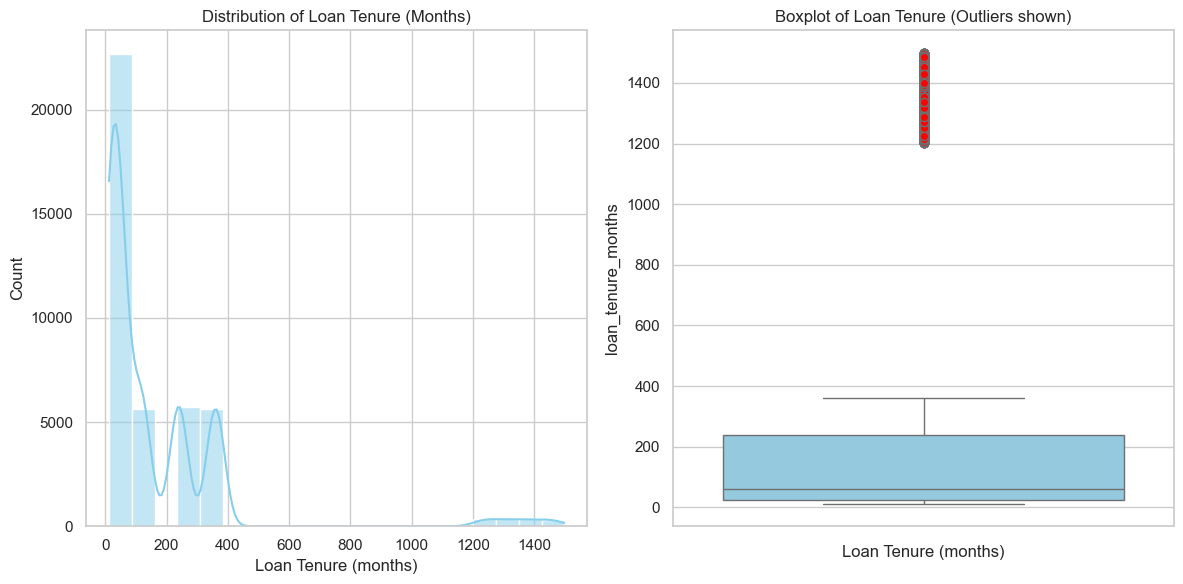

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.histplot(df["loan_tenure_months"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Loan Tenure (Months)")
axes[0].set_xlabel("Loan Tenure (months)")
axes[0].set_ylabel("Count")


sns.boxplot(df["loan_tenure_months"], ax=axes[1], color="skyblue", fliersize=6, flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
axes[1].set_title("Boxplot of Loan Tenure (Outliers shown)")
axes[1].set_xlabel("Loan Tenure (months)")

plt.tight_layout()
plt.show()

The distribution of loan tenure is highly right-skewed, most of the data is concentrated below 400 months, while the whiskers extend slightly beyond this range. The points above the upper whisker indicate outliers, corresponding to unusually long loan tenures. These extreme values could distort analyses if not addressed. Overall, the plots support the decision to apply the IQR method to remove high-tenure outliers.

In [127]:
Q1 = df["loan_tenure_months"].quantile(0.25)
Q3 = df["loan_tenure_months"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

outliers = df[df["loan_tenure_months"] > upper_limit]
print(f"{len(outliers)} outliers found in loan_tenure_months column.")

df_filtered = df[df["loan_tenure_months"] <= upper_limit]

1309 outliers found in loan_tenure_months column.


The first ($Q_1$) and third ($Q_3$) quartiles were calculated to determine the Interquartile Range ($IQR$), and an upper threshold was set at $Q_3 + 1.5 \times IQR$. Loan tenures exceeding this threshold were identified as statistical outliers, and the total number of outliers was recorded.

After identifying outliers, the dataset was filtered to create a cleaned version (df_filtered) containing only loan tenures within the acceptable range. This approach allowed for both the retention of the original data for reference and the preparation of a clean dataset for further analysis.

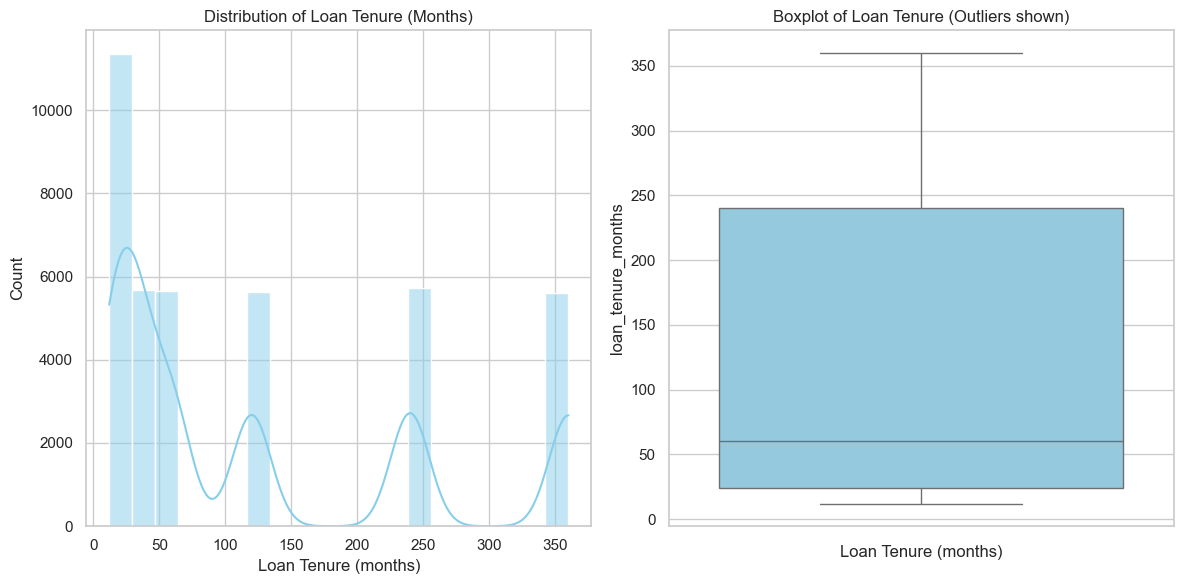

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.histplot(df_filtered["loan_tenure_months"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Loan Tenure (Months)")
axes[0].set_xlabel("Loan Tenure (months)")
axes[0].set_ylabel("Count")


sns.boxplot(df_filtered["loan_tenure_months"], ax=axes[1], color="skyblue", fliersize=6, flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
axes[1].set_title("Boxplot of Loan Tenure (Outliers shown)")
axes[1].set_xlabel("Loan Tenure (months)")

plt.tight_layout()
plt.show()

To visually confirm the filtering process, boxplots were generated before and after removing the outliers.

### 5.3 Check for missing values
Missing values:

In [164]:
missing_values = df_filtered.isnull().sum()
missing_percent = 100 * missing_values / len(df_filtered)
missing_percent = missing_percent.round(2)

missing_summary = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage (%)": missing_percent
})

missing_summary = missing_summary[missing_summary["Missing Count"] > 0]

if missing_summary.empty:
    print("No missing values found in the dataset.")
else:
    print("Columns with missing values:\n")
    print(missing_summary)
    total_missing = missing_values.sum()
    total_cells = df_filtered.size  
    total_missing_percent = round(100 * total_missing / total_cells, 2)
    print(f"\nTotal missing values: {total_missing}")
    print(f"Total missing percentage: {total_missing_percent}%")



Columns with missing values:

                      Missing Count  Missing Percentage (%)
monthly_income                 3970                   10.02
number_of_dependents           3996                   10.08

Total missing values: 7966
Total missing percentage: 0.67%


Visualizing missing data, the white gaps in the matrix represent missing values for each column:

<Axes: >

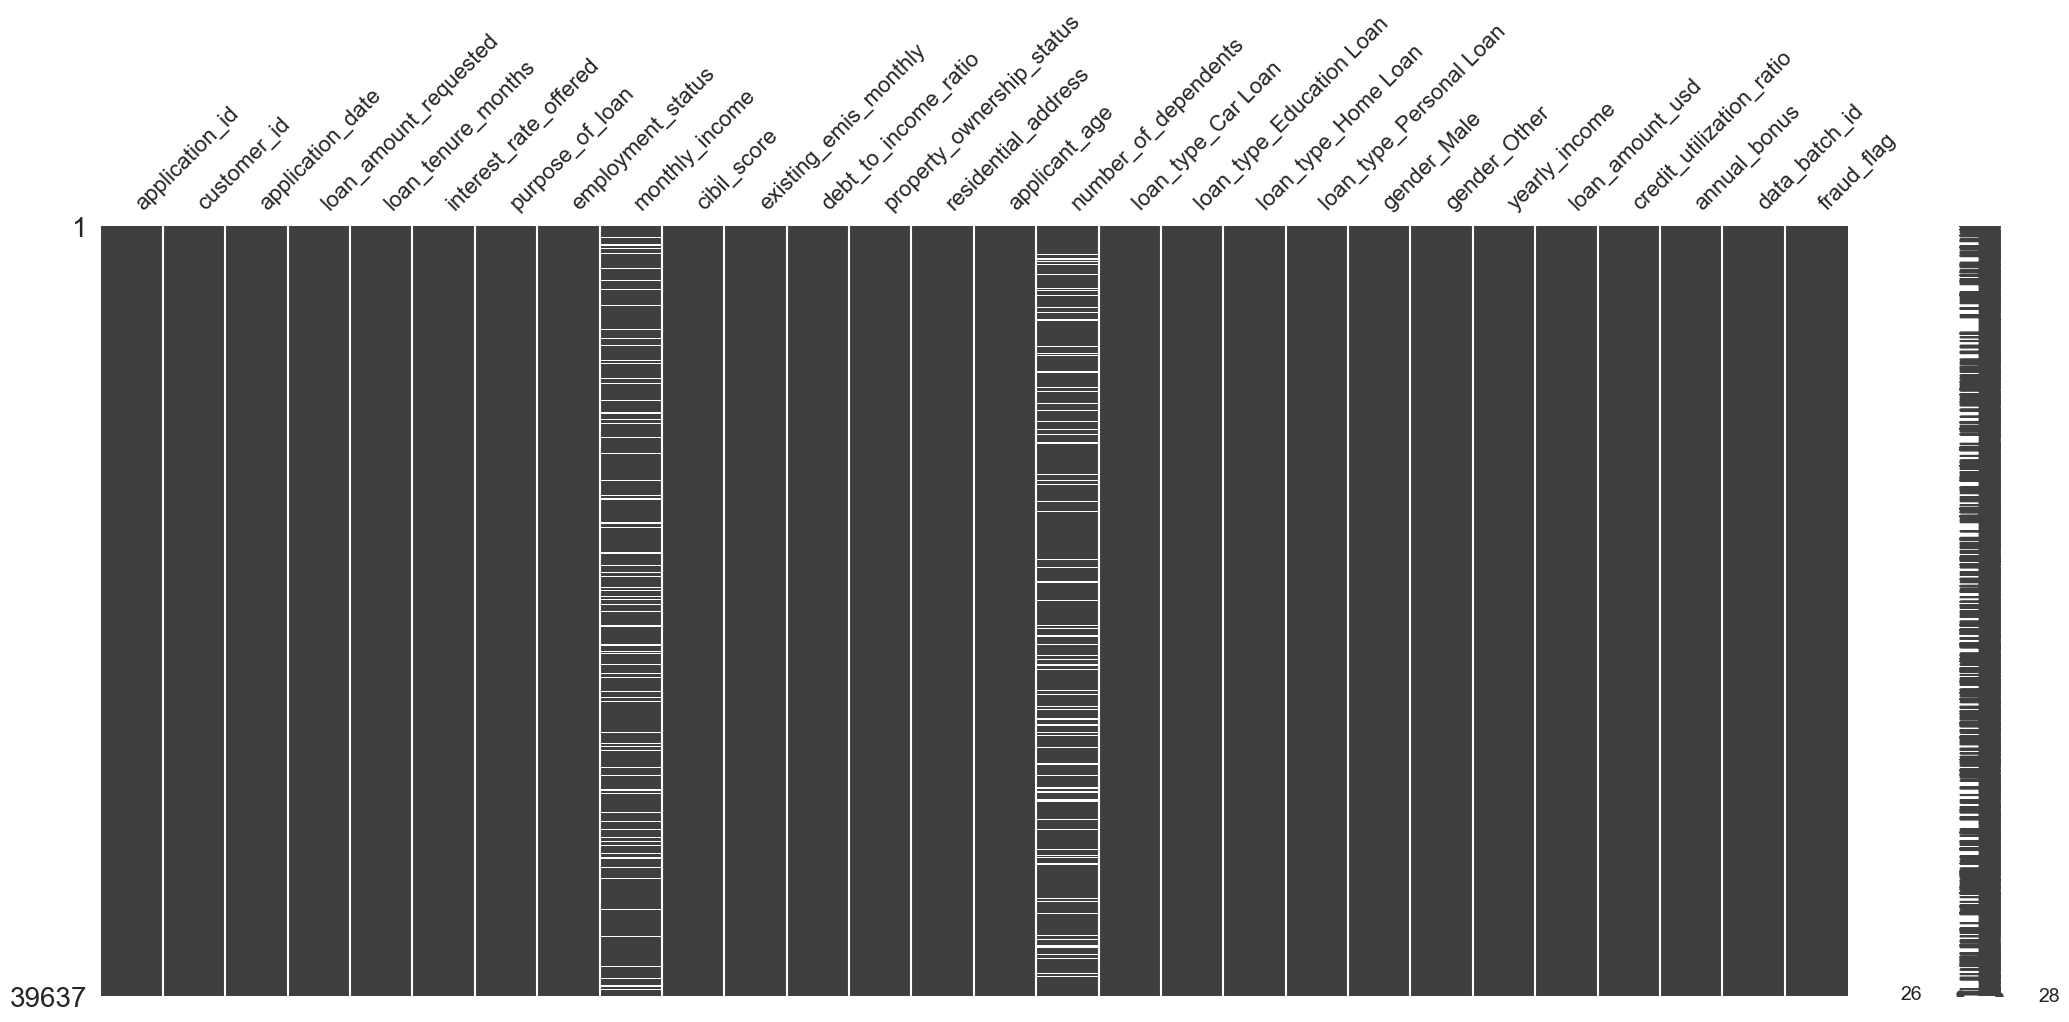

In [130]:
msno.matrix(df_filtered) 

The matrix view clearly shows that the columns nullity is not perfectly correlated. The majority of the dataset remains 100% complete.

In [131]:
total_rows = len(df_filtered)

rows_with_na = df_filtered.dropna(how='any')
rows_to_remove = total_rows - len(rows_with_na)

percent_to_remove = round(100 * rows_to_remove / total_rows, 2)

print(f"Rows to remove: {rows_to_remove}")
print(f"Percentage of dataset: {percent_to_remove}%")
print(f"Missing values in pairs: {total_missing - rows_to_remove}")

Rows to remove: 7565
Percentage of dataset: 19.09%
Missing values in pairs: 401


The total missing percentage considers all values in the dataset. Although it shows only 0.72%, if we decide to handle these missing values by dropping them, it would require removing the entire row. There are 7966 missing values in total, but some missing values appear in pairs on the same row in 401 cases. Considering that removing all 7,565 values would impact 19.09% of the dataset, which it is not be the best approach for handling the missing values in that case. Alternative methods for handling missing data, such as imputation, forward/backward fill, or using model-based techniques, could be considered to minimize data loss.

## 6. Descriptive Statistics
### 6.1 Numerical Variables Summary

In [161]:
num_cols = [
    col for col in df_filtered.select_dtypes(include=['number']).columns
    if df_filtered[col].nunique() > 2  # remove dummies e flags binárias
]

numeric_summary = (
    df_filtered[num_cols]
    .describe()
    .T
    .assign(skew=lambda x: df_filtered[num_cols].skew())
    .round(2)
)

print(numeric_summary)

                            count           mean            std       min  \
loan_amount_requested     39637.0  515522.315009  327827.552635  100000.0   
loan_tenure_months        39637.0     121.553094     121.423618      12.0   
interest_rate_offered     39637.0      10.526348       1.993901      5.27   
monthly_income            35667.0   50747.150027   23841.176474   10000.0   
cibil_score               39637.0     699.031208      50.108209     484.0   
existing_emis_monthly     39637.0    3057.060322     1893.44771       0.0   
debt_to_income_ratio      39637.0       8.555975       9.582105       0.0   
applicant_age             39637.0      43.063224      12.967522      21.0   
number_of_dependents      35641.0       2.012682       1.406298       0.0   
yearly_income             39637.0   609078.72947  285960.892929  120000.0   
loan_amount_usd           39637.0  555054.960769  297476.911981  108000.0   
credit_utilization_ratio  39637.0       0.498438       0.197621       0.0   

### 6.2 Categorical Variables Summary

In [133]:
print(df_filtered.describe(include="category").to_string())

           purpose_of_loan employment_status property_ownership_status
count                39637             39637                     39637
unique                   7                 6                         6
top     Debt Consolidation          Salaried                    Rented
freq                  5723              6773                      9388


In [165]:
dummy_cols = [
    'loan_type_Car Loan', 'loan_type_Education Loan', 'loan_type_Home Loan',
    'loan_type_Personal Loan', 'gender_Male', 'gender_Other', 'fraud_flag'
]

dummy_summary = (
    df_filtered[dummy_cols]
    .agg(['sum', 'count'])  # nomes corretos
    .T
    .assign(
        total=lambda x: x['count'],
        count_1=lambda x: x['sum'],
        count_0=lambda x: x['count'] - x['sum'],
        percent_1=lambda x: (x['count_1'] / x['total'] * 100).round(2),
        percent_0=lambda x: (x['count_0'] / x['total'] * 100).round(2)
    )[["total", "count_0", "percent_0", "count_1", "percent_1"]]
)

print(dummy_summary)

                          total  count_0  percent_0  count_1  percent_1
loan_type_Car Loan        39637    31735      80.06     7902      19.94
loan_type_Education Loan  39637    31721      80.03     7916      19.97
loan_type_Home Loan       39637    31624      79.78     8013      20.22
loan_type_Personal Loan   39637    31652      79.85     7985      20.15
gender_Male               39637    26670      67.29    12967      32.71
gender_Other              39637    26202      66.10    13435      33.90
fraud_flag                39637    34286      86.50     5351      13.50


The dataset shows 13.5% fraudulent applications versus 86.5% legitimate ones.

## 7. Univariable Distribution Analysis
For the univariate analysis we will consider one variable at a time, and distinguish between numerical and categorical variables.

### 7.1 Distribution plots for continuous variables (density-normalized histograms)

Each subplot shows a density-normalized histogram for a continuous variable. The `stat="density"` option scales each histogram so that the total area equals 1; therefore the bar heights represent probability density (probability per unit on the x-axis). Because `common_norm=False`, each group's histogram is normalized independently, allowing direct comparison of distribution shapes regardless of group size.

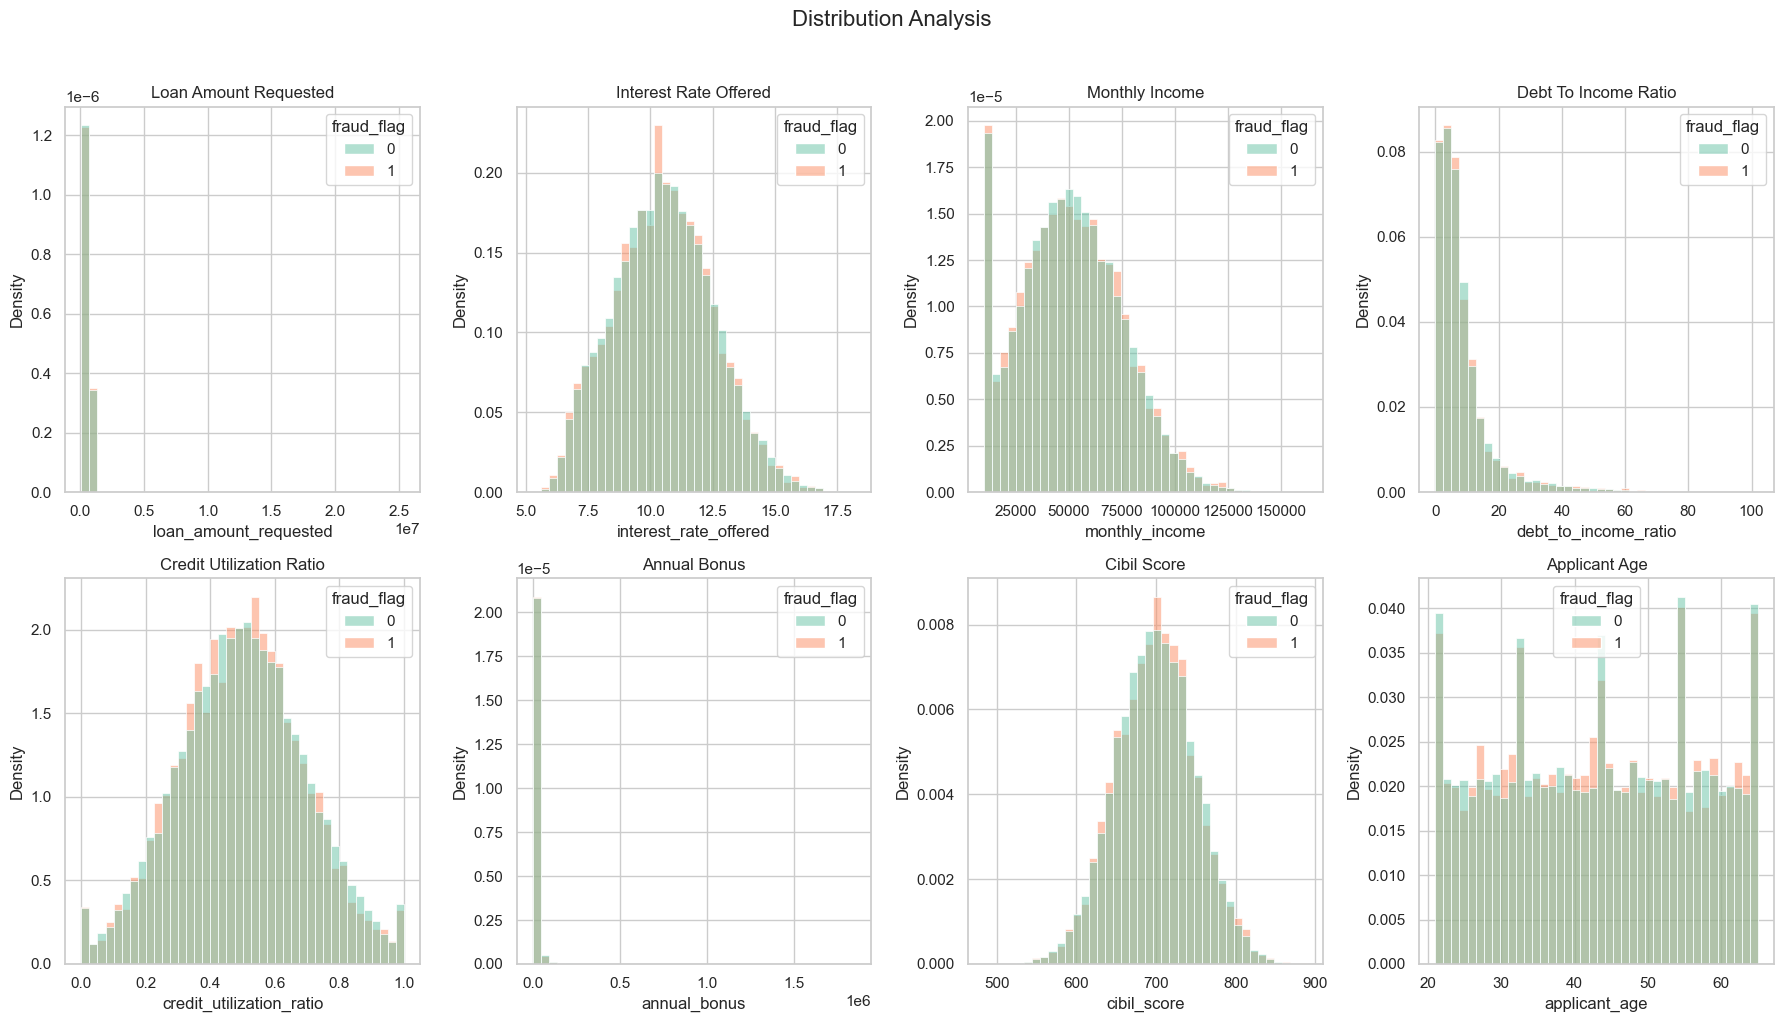

In [142]:
continuous_features = [
    "loan_amount_requested",
    "interest_rate_offered",
    "monthly_income",
    "debt_to_income_ratio",
    "credit_utilization_ratio",
    "annual_bonus",
    "cibil_score",
    "applicant_age"
]

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Distribution Analysis', fontsize=16, y=1.02)
for ax, col in zip(axes.flat, continuous_features):
    sns.histplot(
        data=df_filtered,
        x=col,
        bins=40,
        hue="fraud_flag",
        stat="density",
        common_norm=False,
        palette="Set2",
        ax=ax
    )
    ax.set_title(col.replace("_", " " ).title())
plt.tight_layout()
plt.show()

### 7.2 Boxplots

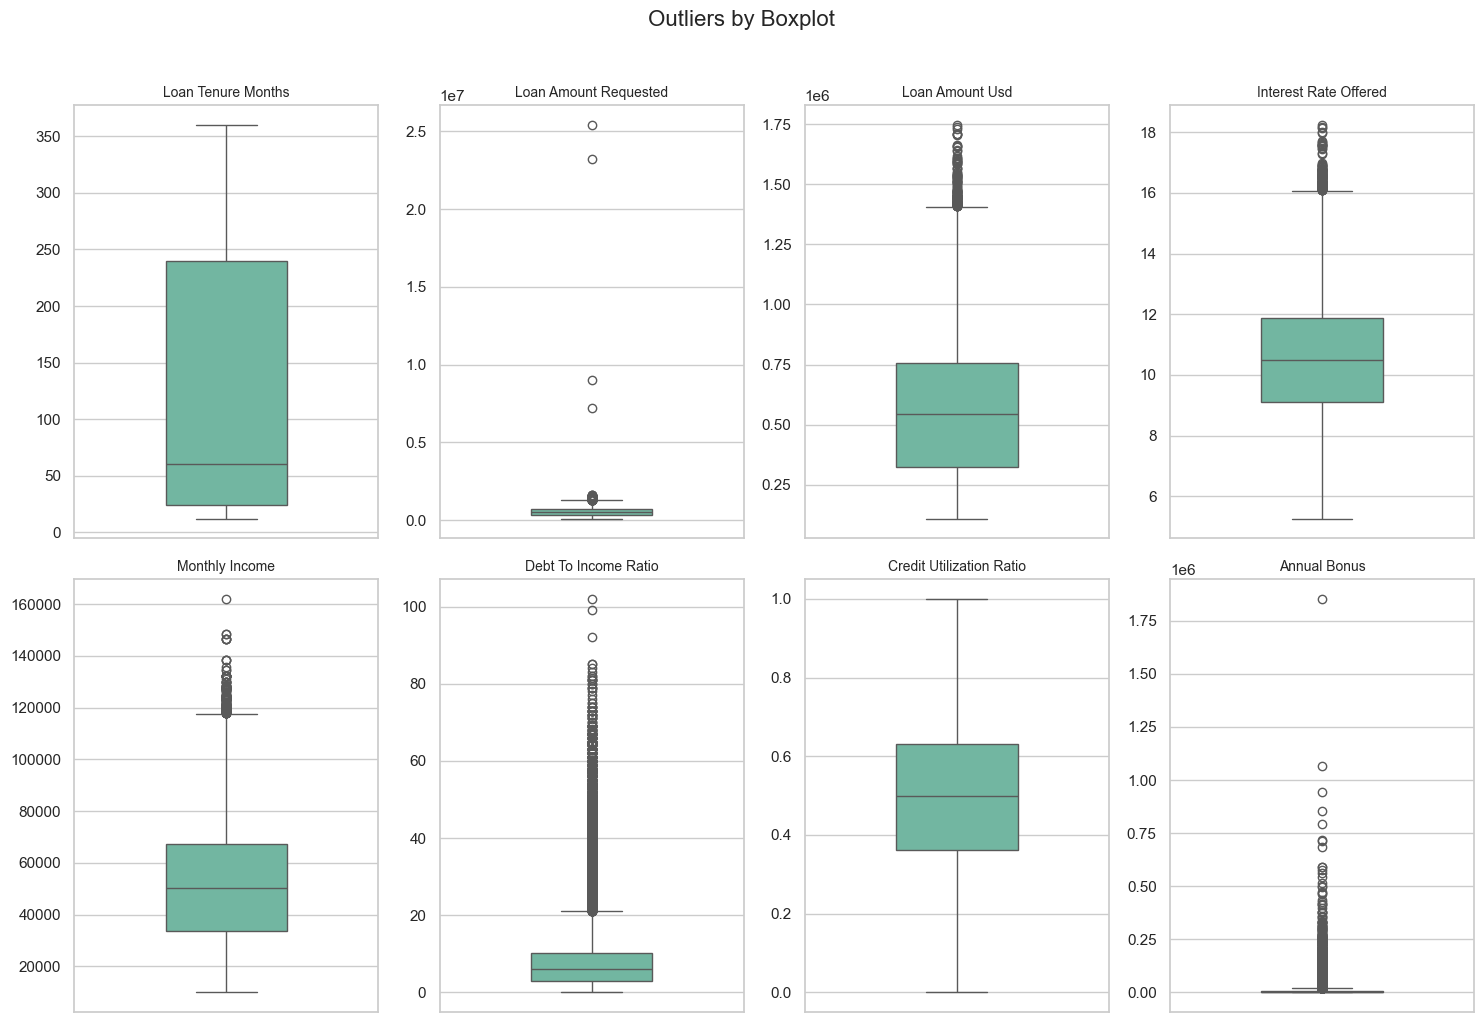

In [167]:
sns.set_theme(style="whitegrid", palette="Set1")

continuous_features = [
    "loan_tenure_months",
    "loan_amount_requested",
    "loan_amount_usd",
    "interest_rate_offered",
    "monthly_income",
    "debt_to_income_ratio",
    "credit_utilization_ratio",
    "annual_bonus",
    "cibil_score",
    "applicant_age",
    "existing_emis_monthly",
    "yearly_income"
]

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Outliers by Boxplot', fontsize=16, y=1.02)

for ax, col in zip(axes.flatten(), continuous_features):
    sns.boxplot(
        data=df_filtered,
        y=col,
        ax=ax,
        width=0.4,
        color=sns.color_palette("Set2")[0],  
        showfliers=True,  
    )
    ax.set_title(col.replace('_', ' ').title(), fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


### 7.3 Distribution analysis for categorical variables

In [144]:
dummy_cols = [
    'loan_type_Car Loan', 'loan_type_Education Loan', 'loan_type_Home Loan',
    'loan_type_Personal Loan', 'gender_Male', 'gender_Other', 'fraud_flag'
]

categorical_cols = [
    c for c in df_filtered.select_dtypes(include=['category']).columns
    if c not in dummy_cols
]

all_cats = dummy_cols + categorical_cols

for col in all_cats:
    print(f"Distribution ({col}):")
    counts = df_filtered[col].value_counts(dropna=False)
    percentages = df_filtered[col].value_counts(normalize=True, dropna=False) * 100
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(1)
    })
    print(summary_df)
    print('-' * 50)



Distribution (loan_type_Car Loan):
                    Count  Percentage
loan_type_Car Loan                   
0                   31735        80.1
1                    7902        19.9
--------------------------------------------------
Distribution (loan_type_Education Loan):
                          Count  Percentage
loan_type_Education Loan                   
0                         31721        80.0
1                          7916        20.0
--------------------------------------------------
Distribution (loan_type_Home Loan):
                     Count  Percentage
loan_type_Home Loan                   
0                    31624        79.8
1                     8013        20.2
--------------------------------------------------
Distribution (loan_type_Personal Loan):
                         Count  Percentage
loan_type_Personal Loan                   
0                        31652        79.9
1                         7985        20.1
---------------------------------------

In [185]:
categCols = [
    'purpose_of_loan', 
    'employment_status', 
    'property_ownership_status'
]

for column in categCols:
    df_filtered.loc[:, column] = (
        df_filtered.loc[:, column]
        .astype(str)        
        .str.strip()
        .str.title()
        .astype('category') 
    )

In [186]:
dummy_cols = [
    'loan_type_Car Loan', 'loan_type_Education Loan', 'loan_type_Home Loan',
    'loan_type_Personal Loan', 'gender_Male', 'gender_Other', 'fraud_flag'
]

categorical_cols = [
    c for c in df_filtered.select_dtypes(include=['category']).columns
    if c not in dummy_cols
]

all_cats = dummy_cols + categorical_cols

for col in all_cats:
    print(f"Distribution ({col}):")
    counts = df_filtered[col].value_counts(dropna=False)
    percentages = df_filtered[col].value_counts(normalize=True, dropna=False) * 100
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(1)
    })
    print(summary_df)
    print('-' * 50)

Distribution (loan_type_Car Loan):
                    Count  Percentage
loan_type_Car Loan                   
0                   31735        80.1
1                    7902        19.9
--------------------------------------------------
Distribution (loan_type_Education Loan):
                          Count  Percentage
loan_type_Education Loan                   
0                         31721        80.0
1                          7916        20.0
--------------------------------------------------
Distribution (loan_type_Home Loan):
                     Count  Percentage
loan_type_Home Loan                   
0                    31624        79.8
1                     8013        20.2
--------------------------------------------------
Distribution (loan_type_Personal Loan):
                         Count  Percentage
loan_type_Personal Loan                   
0                        31652        79.9
1                         7985        20.1
---------------------------------------

### 7.4 Analises of encoded categorical features

In [145]:
loan_dummies = [
    'loan_type_Car Loan', 'loan_type_Education Loan',
    'loan_type_Home Loan', 'loan_type_Personal Loan'
]

df_filtered.loc[:, 'loan_type_sum'] = df_filtered[loan_dummies].sum(axis=1)

summary = df_filtered['loan_type_sum'].value_counts()

print("Loan type encoding summary:\n")
print(f"Exactly one loan type selected: {summary.get(1, 0)} rows")
print(f"No loan type selected: {summary.get(0, 0)} rows")
print(f"Multiple loan types selected: {summary[summary.index > 1].sum()} rows\n")

Loan type encoding summary:

Exactly one loan type selected: 31816 rows
No loan type selected: 7821 rows
Multiple loan types selected: 0 rows



In [148]:
gender_dummies = ['gender_Male', 'gender_Other']

df_filtered.loc[:, 'gender_sum'] = df_filtered[gender_dummies].sum(axis=1)

gender_counts = df_filtered['gender_sum'].value_counts().sort_index()

print("Gender encoding summary:\n")
print(f"Exactly one gender selected: {gender_counts.get(1, 0)} rows")
print(f"No gender selected: {gender_counts.get(0, 0)} rows")
print(f"Multiple genders selected: {gender_counts.get(2, 0)} rows")

Gender encoding summary:

Exactly one gender selected: 26402 rows
No gender selected: 13235 rows
Multiple genders selected: 0 rows


## 8. Multivariate Analysis

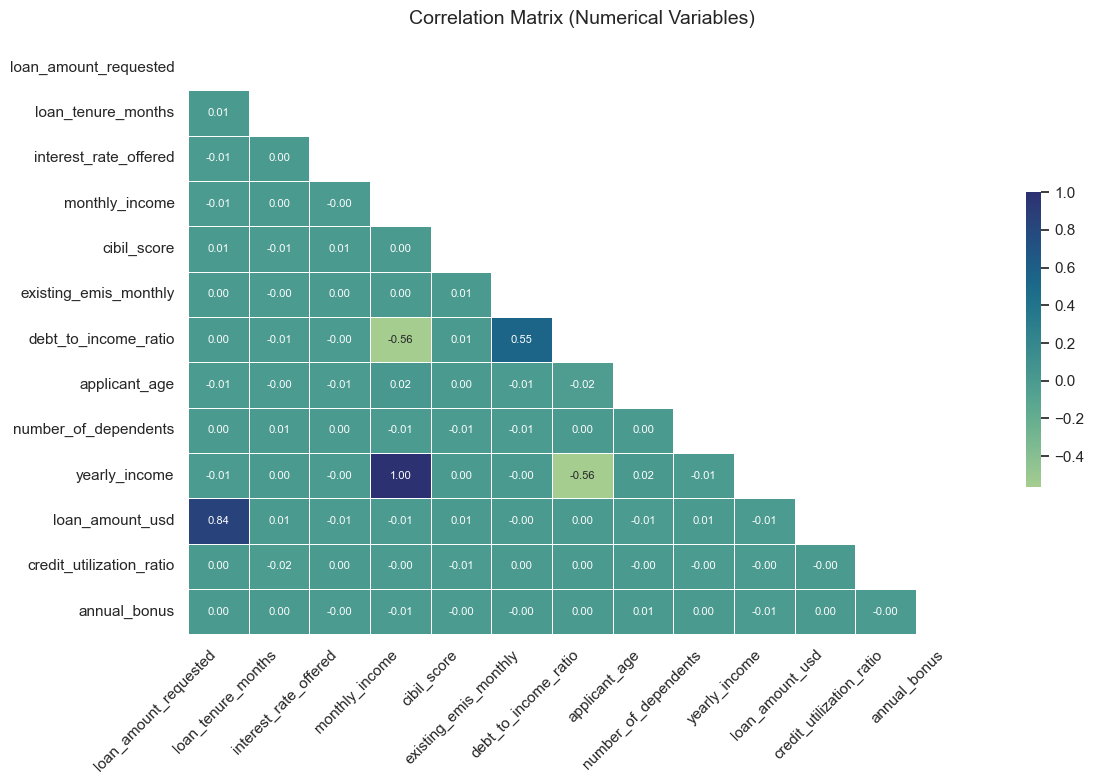

In [157]:
num_cols = [
    col for col in df_filtered.select_dtypes(include=['number']).columns
    if df_filtered[col].nunique() > 2
]

corr = df_filtered[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.set_theme(style="white")

sns.heatmap(
    corr,
    mask=mask,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .5},
    annot_kws={"size": 8}
)

plt.title("Correlation Matrix (Numerical Variables)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df_pair = df_filtered.copy()

pair_features = [
    "loan_tenure_months",
    "loan_amount_requested",
    "loan_amount_usd",
    "interest_rate_offered",
    "monthly_income",
    "debt_to_income_ratio",
    "credit_utilization_ratio",
    "annual_bonus",
    "cibil_score",
    "applicant_age",
    "existing_emis_monthly",
    "yearly_income"
]

sns.pairplot(
    data=df_pair,
    vars=pair_features,
    hue="fraud_flag",
    palette="Set2",
    corner=True,       
    plot_kws={"alpha": 0.5, "s": 20}  
)

plt.suptitle("Pairplot - Continuous Features", y=1.02)
plt.show()

In [ ]:
def loan_type_label(row):
    if row['loan_type_Car Loan'] == 1:
        return 'Car'
    elif row['loan_type_Education Loan'] == 1:
        return 'Education'
    elif row['loan_type_Home Loan']==1:
        return 'Home'
    elif row['loan_type_Personal Loan']==1:
        return 'Personal'
    else:
        return 'Other'

df_filtered['loan_type_label'] = df_filtered.apply(loan_type_label, axis=1)

pd.crosstab(df_filtered['loan_type_label'], df_filtered['purpose_of_loan'])

C:\Users\raque\AppData\Local\Temp\ipykernel_13512\4056970370.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['loan_type_label'] = df_filtered.apply(loan_type_label, axis=1)


purpose_of_loan,Business Expansion,Debt Consolidation,Education,Home Renovation,Medical Emergency,Vehicle Purchase,Wedding
loan_type_label,,,,,,,
Car,1094,1163,1135,1122,1135,1132,1121
Education,1060,1166,1211,1120,1134,1112,1113
Home,1166,1113,1140,1166,1119,1124,1185
Other,1158,1145,1078,1122,1143,1076,1099
Personal,1130,1136,1094,1155,1137,1143,1190
